C:\Users\david\Anaconda_23\python.exe
last day 2023-10-31 23:59:57
first day 2023-10-01 00:00:05
avg_temp Index(['time', 'temperature_2m_mean (°C)'], dtype='object')
last day 2023-10-31
first day 2023-10-01
avg_duration Index(['date', 'avg_duration'], dtype='object')
avg_temp Index(['date', 'temperature_2m_mean (°C)'], dtype='object')
y values [19.47266998 14.71605827 14.07669165 15.25049424 13.51931173 13.41270397
 16.42939914 18.97189835 13.81718729 12.48287899 12.49810215 11.87482787
 11.3070144  12.69565645 15.13763941 11.62469727 12.61917235 12.41789843
 11.64117716 13.48229017 16.32449863 16.74239222 12.92708036 14.24586653
 11.58368983 12.13882877 13.52451876 14.35384672 14.96585371 10.48656362
  9.88678076]
Intercept: 
 12.369285974168214
Coefficients: 
 [0.10814029]
R-squared:  0.06570920085870502


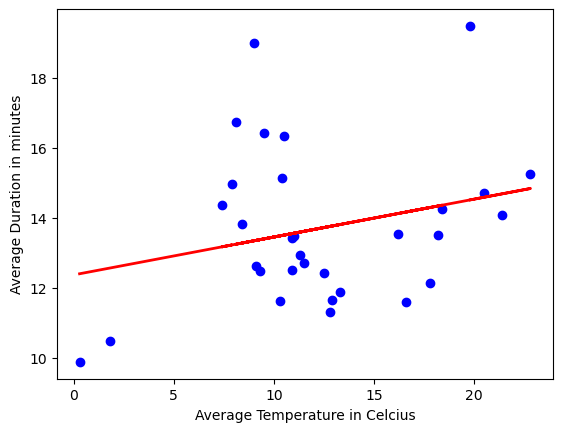

actual values of duration in mins [14.35384672 11.62469727 14.24586653 12.41789843 13.81718729 12.48287899
 10.48656362]
predicted values of duration in mins [12.58316582 12.91325593 13.83523178 13.16366913 12.69698999 12.79943175
 11.94575042]


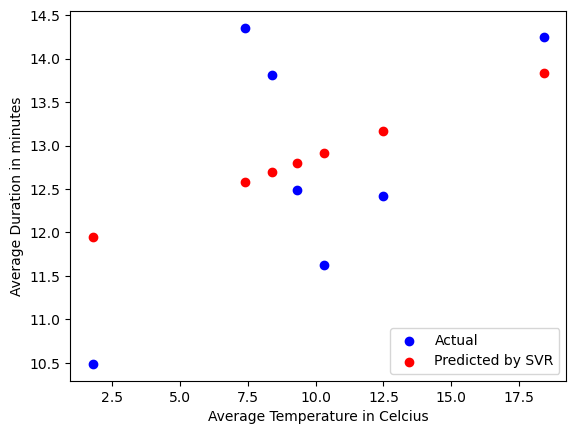

In [1]:
# Author David Miszczyk, CS 418 Fall 2023
# Now, we compare Divvy ride duration to mean daily temperature for 10-1-2023 to 10-31-2023.
import pandas as pd
import sys
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

print(sys.executable)

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv("2023_10_Divvy.csv",sep=',', low_memory=False)

#print("Divvy",df)

print("last day", df['started_at'].max())

print("first day", df['started_at'].min())

# bd = pd.read_csv('bike_data.zip', compression='zip') # 10-2023 Divvy data

# print(bd)

avg_temp = pd.read_csv("2023_10_weather.csv", skiprows=2)

print("avg_temp", avg_temp.columns)

avg_temp.rename(columns={'time': 'date'}, inplace=True) # rename 'time' to 'date' column

print("last day", avg_temp['date'].max())

print("first day", avg_temp['date'].min())

df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])

# Calculate ride duration in minutes.
df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()/60

# clean duration column to remove anything longer than 24 hours.(1440 minutes)
df = df[df['duration'] <= 1440]

# Extract date from 'started_at'
df['date'] = df['started_at'].dt.date

# Calculate average duration for each day
avg_duration = df.groupby('date')['duration'].mean()

# Convert the 'avg_duration' Series into a DataFrame
avg_duration = avg_duration.reset_index()

avg_duration.columns = ['date', 'avg_duration']

print("avg_duration", avg_duration.columns)

print("avg_temp", avg_temp.columns)

# Convert the 'date' columns to datetime
avg_temp['date'] = pd.to_datetime(avg_temp['date'])

avg_duration['date'] = pd.to_datetime(avg_duration['date'])

# Merge the dataframes on 'date'
merged_df = pd.merge(avg_temp, avg_duration, on='date')

# Now you can perform linear regression on the merged dataframe
X = merged_df['temperature_2m_mean (°C)'].values.reshape(-1,1) # reshaping for sklearn compatibility

y = merged_df['avg_duration'].values

print("y values", y)

# Create a LinearRegression object
lm = LinearRegression()

lm.fit(X,y)

# Now, you can see the parameters of your fitted model
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

r_squared = lm.score(X, y)

print('R-squared: ', r_squared) # check R^2 value

# Plot the equation of the line and data points given by the Linear Regression.
plt.scatter(merged_df['temperature_2m_mean (°C)'], merged_df['avg_duration'], color='blue')
plt.xlabel('Average Temperature in Celcius')
plt.ylabel('Average Duration in minutes')

# Plotting the regression line
predicted_values = lm.predict(X)
plt.plot(merged_df['temperature_2m_mean (°C)'], predicted_values, color='red', linewidth=2)

plt.show()

# Assuming X is your feature set and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVR object
svr = SVR(kernel='linear')

# Train the model using the training sets
svr.fit(X_train, y_train)

# Now, you can use the trained model to predict the test data
y_pred = svr.predict(X_test)

print("actual values of duration in mins", y_test)
print("predicted values of duration in mins", y_pred)

# Scatter plot of the actual vs predicted values for the SVM.
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted by SVR')
plt.xlabel('Average Temperature in Celcius')
plt.ylabel('Average Duration in minutes')
plt.legend()
plt.show()

This section describes the inferences and correlations discovered from the 1. Linear Regression.

Since, the data points for the actual duration values appear to be very scattered, there is little to no predictive value for using a linear regression.Many of the blue cluster data points appear to have largely different durations and it's not uniformly less than or more than the predicted value by the regression line. Therefore, it is my conconclusion that the linear regression is not a good fit for predicting ride duration based on mean daily temperature in Celcius.

This section describes the inferences and correlations discovered from the 2. Support Vector Regression.

Once again, the SVR shows a very linear pattern in it's prediction as evidenced by the 7 red clusters. However, with the data set comprised of lower mean daily temperatures, probably due to the time of year being in the fall 2023 compared to the previous dataset which took place in spring 2020, the SVR performed even worse. It showed a large difference in predictive accuracy in every cluster in the plot except the cluster 4 I'd say, i.e. 12.5 mins actual and the predicted is slightly higher around 12.8 mins. And, the last cluster or cluster 7 is accurate to around 5%. Therefore, it's my conclusion that the SVR is not the best fitting model for predicting ride duration based on mean daily temperature.


Actual values of duration in mins [14.35384672 11.62469727 14.24586653 12.41789843 13.81718729 12.48287899
 10.48656362]
predicted values of duration in mins [14.96585371 15.13763941 13.51931173 11.3070144  16.74239222 12.61917235
  9.88678076]


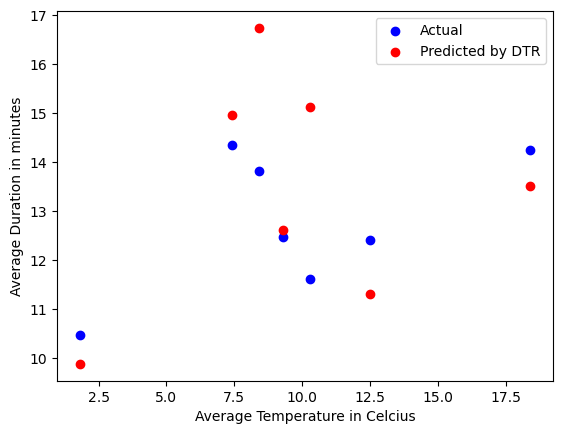

In [3]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dtree.fit(X_train, y_train)

# Now, you can use the trained model to predict the test data
y_pred = dtree.predict(X_test)

print("Actual values of duration in mins", y_test)
print("predicted values of duration in mins", y_pred)

# Scatter plot of the actual vs predicted values for the Decision Tree.
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted by DTR')
plt.xlabel('Average Temperature in Celcius')
plt.ylabel('Average Duration in minutes')
plt.legend()
plt.show()

This section describes the inferences and correlations discovered from the 3. Decision Tree Regression.

In this dataset of temperature data for October 2023, the DTR actually performed better than it did for the previous dataset containing mean daily temperature for April 2020. It got reasonably close, within 10%, for 5/7 clusters. The concerning thing about this model is that it predicted very poorly for cluster 3 and 5. And, the reason that is concerning is because those clusters do not appear to be outliers. They are well within the range of the rest of the data and similar to other data points by around 5%. Yet, in both cases the DTR model overpredicted drastically. For cluster 3, it overpredicted by giving 16.9 mins versus 13.9 mins actual and cluster 5, it predicted even worse at 15.2 mins versus 11.3 mins actual. For these reasons, it is my conclusion that the DTR is not a best fitting model even though it is better than the linear regression or the SVR for predicting duration.

Actual values of duration in mins [14.35384672 11.62469727 14.24586653 12.41789843 13.81718729 12.48287899
 10.48656362]
Predicted values of duration in mins [15.94574316 14.17104687 14.28611172 12.08915125 15.94574316 15.89652158
 14.63721948]


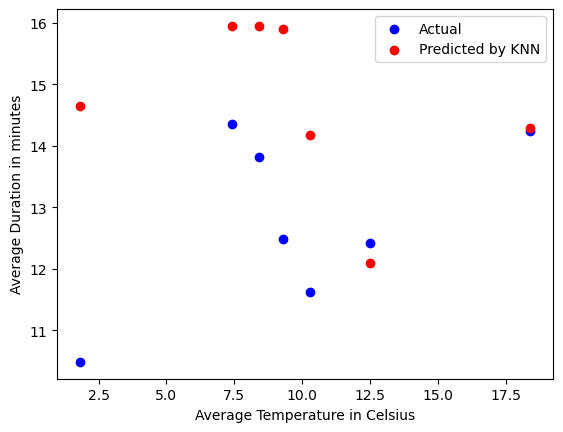

In [4]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Create a KNeighborsRegressor object
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Use the trained model to predict the test data
y_pred_knn = knn.predict(X_test)

# Outputting the actual and predicted values
print("Actual values of duration in mins", y_test)
print("Predicted values of duration in mins", y_pred_knn)

# Scatter plot of the actual vs predicted values for the KNN.
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_knn, color='red', label='Predicted by KNN')
plt.xlabel('Average Temperature in Celsius')
plt.ylabel('Average Duration in minutes')
plt.legend()
plt.show()


This section describes the inferences and correlations discovered from the 4. 5-KNN.

In the previous dataset, the 5-KNN was the best model for predicting ride duration based on mean daily temperature. In this dataset, it did not perform better than the DTR it seems.